# Banco de dados -  Faces

Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip

### Importar bibliotecas

In [7]:
import os
import gridfs
from pymongo import MongoClient
from PIL import Image
from IPython.display import display
import io

### Conexão com banco - MongoDB

In [8]:
client = MongoClient("mongodb://localhost:27017/")
db = client["faces_db"]
fs = gridfs.GridFS(db)

### Inserindo imagens

In [11]:
# Caminho da pasta com imagens
pasta = "frontalimages_manuallyaligned_part1"

# Lista todos os arquivos .jpg da pasta
arquivos = [f for f in os.listdir(pasta) if f.lower().endswith(".jpg")]

print(f"Encontradas {len(arquivos)} imagens na pasta '{pasta}'")

for nome in arquivos:
    caminho = os.path.join(pasta, nome)

    if fs.exists(filename=nome):
        print(f"Já existe: {nome}")
        continue

    with open(caminho, "rb") as f:
        fs.put(f, filename=nome)
        print(f"Salva: {nome}")


Encontradas 200 imagens na pasta 'frontalimages_manuallyaligned_part1'
Já existe: 100a.jpg
Já existe: 100b.jpg
Já existe: 10a.jpg
Já existe: 10b.jpg
Já existe: 11a.jpg
Já existe: 11b.jpg
Já existe: 12a.jpg
Já existe: 12b.jpg
Já existe: 13a.jpg
Já existe: 13b.jpg
Já existe: 14a.jpg
Já existe: 14b.jpg
Já existe: 15a.jpg
Já existe: 15b.jpg
Já existe: 16a.jpg
Já existe: 16b.jpg
Já existe: 17a.jpg
Já existe: 17b.jpg
Já existe: 18a.jpg
Já existe: 18b.jpg
Já existe: 19a.jpg
Já existe: 19b.jpg
Já existe: 1a.jpg
Já existe: 1b.jpg
Já existe: 20a.jpg
Já existe: 20b.jpg
Já existe: 21a.jpg
Já existe: 21b.jpg
Já existe: 22a.jpg
Já existe: 22b.jpg
Já existe: 23a.jpg
Já existe: 23b.jpg
Já existe: 24a.jpg
Já existe: 24b.jpg
Já existe: 25a.jpg
Já existe: 25b.jpg
Já existe: 26a.jpg
Já existe: 26b.jpg
Já existe: 27a.jpg
Já existe: 27b.jpg
Já existe: 28a.jpg
Já existe: 28b.jpg
Já existe: 29a.jpg
Já existe: 29b.jpg
Já existe: 2a.jpg
Já existe: 2b.jpg
Já existe: 30a.jpg
Já existe: 30b.jpg
Já existe: 31a.jpg


### Listar as imagens armazenadas

In [12]:
for file in db.fs.files.find({}, {"filename": 1, "_id": 0 }):
    print("_", file["filename"])

_ 100a.jpg
_ 100b.jpg
_ 10a.jpg
_ 10b.jpg
_ 11a.jpg
_ 11b.jpg
_ 12a.jpg
_ 12b.jpg
_ 13a.jpg
_ 13b.jpg
_ 14a.jpg
_ 14b.jpg
_ 15a.jpg
_ 15b.jpg
_ 16a.jpg
_ 16b.jpg
_ 17a.jpg
_ 17b.jpg
_ 18a.jpg
_ 18b.jpg
_ 19a.jpg
_ 19b.jpg
_ 1a.jpg
_ 1b.jpg
_ 20a.jpg
_ 20b.jpg
_ 21a.jpg
_ 21b.jpg
_ 22a.jpg
_ 22b.jpg
_ 23a.jpg
_ 23b.jpg
_ 24a.jpg
_ 24b.jpg
_ 25a.jpg
_ 25b.jpg
_ 26a.jpg
_ 26b.jpg
_ 27a.jpg
_ 27b.jpg
_ 28a.jpg
_ 28b.jpg
_ 29a.jpg
_ 29b.jpg
_ 2a.jpg
_ 2b.jpg
_ 30a.jpg
_ 30b.jpg
_ 31a.jpg
_ 31b.jpg
_ 32a.jpg
_ 32b.jpg
_ 33a.jpg
_ 33b.jpg
_ 34a.jpg
_ 34b.jpg
_ 35a.jpg
_ 35b.jpg
_ 36a.jpg
_ 36b.jpg
_ 37a.jpg
_ 37b.jpg
_ 38a.jpg
_ 38b.jpg
_ 39a.jpg
_ 39b.jpg
_ 3a.jpg
_ 3b.jpg
_ 40a.jpg
_ 40b.jpg
_ 41a.jpg
_ 41b.jpg
_ 42a.jpg
_ 42b.jpg
_ 43a.jpg
_ 43b.jpg
_ 44a.jpg
_ 44b.jpg
_ 45a.jpg
_ 45b.jpg
_ 46a.jpg
_ 46b.jpg
_ 47a.jpg
_ 47b.jpg
_ 48a.jpg
_ 48b.jpg
_ 49a.jpg
_ 49b.jpg
_ 4a.jpg
_ 4b.jpg
_ 50a.jpg
_ 50b.jpg
_ 51a.jpg
_ 51b.jpg
_ 52a.jpg
_ 52b.jpg
_ 53a.jpg
_ 53b.jpg
_ 54a.jpg
_ 54b.jpg
_ 55a.

### Exibir as imagens em sequência (tipo galeria)

100a.jpg


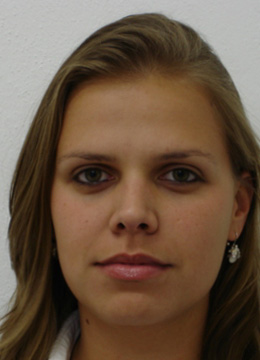

100b.jpg


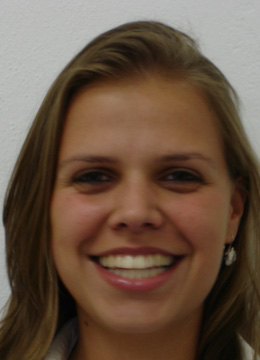

10a.jpg


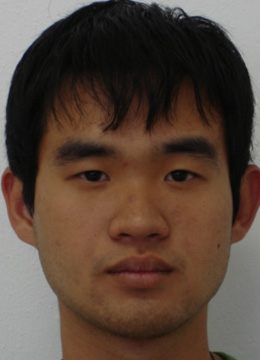

10b.jpg


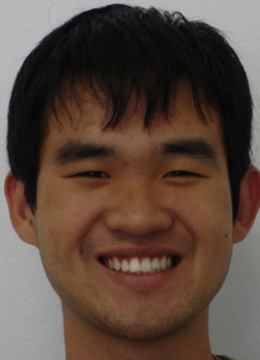

11a.jpg


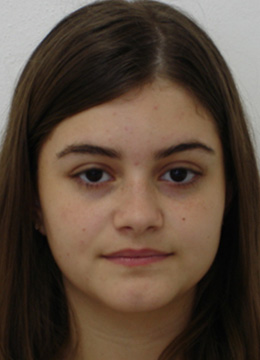

11b.jpg


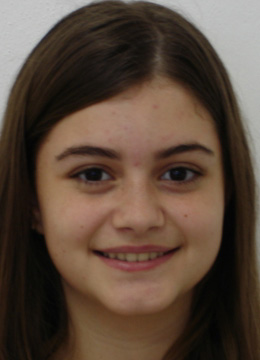

12a.jpg


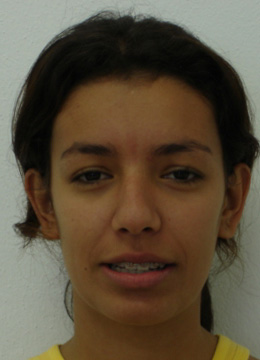

12b.jpg


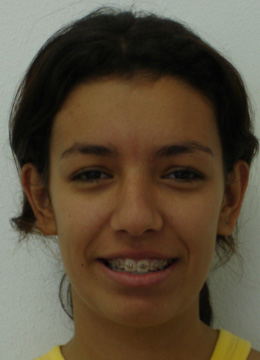

In [14]:
for file in db.fs.files.find().limit(8):
    nome = file["filename"]
    dados = fs.get(file["_id"]).read()
    img = Image.open(io.BytesIO(dados))
    print(f"{nome}")
    display(img)